# PES (Payment for Ecosystem Services) Dataset Analysis

This notebook analyzes the PES dataset with the following visualizations:
1. Programs by Region/State (Bar Chart) - using Name of Land Unit (1)
2. Programs by Type of Land Unit (Bar Chart) - using Type of Land Unit (1)
3. Programs by Themes Analyzed (Bar Chart) - using Themes Analyzed (1)
4. Programs Over Time (Line Chart)
5. Ecological Effectiveness Assessment
6. Ecological Effect Direction
7. Social Effectiveness Assessment
8. Social Effect Direction

In [1]:
pip install openpyxl


[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: /Users/siyagoel/anaconda3/envs/cs224n/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
# Load the PES dataset
file_path = 'PESMEX20_Database-and-Definitions_06-24 (2).xlsx'

# Read the Excel file - first, let's see what sheets are available
xl_file = pd.ExcelFile(file_path)
print("Available sheets:", xl_file.sheet_names)

# Load the main data sheet (adjust sheet name if needed)
# Try loading the first sheet or a sheet that looks like the main data
df = pd.read_excel(file_path, sheet_name=0)  # Load first sheet

print(f"\nDataset shape: {df.shape}")
print(f"\nColumn names:")
print(df.columns.tolist())
print(f"\nFirst few rows:")
df.head()

Available sheets: ['Database', 'Definitions']

Dataset shape: (142, 95)

Column names:
['webser', 'webser.1', 'webser.2', 'webser.3', 'webser.4', 'webser.5', 'webser.6', 'webser.7', 'webser.8', 'webser.9', 'webser.10', 'webser.11', 'sysrev', 'sysrev.1', 'sysrev.2', 'sysrev.3', 'sysrev.4', 'sysrev.5', 'sysrev.6', 'sysrev.7', 'sysrev.8', 'sysrev.9', 'sysrev.10', 'sysrev.11', 'sysrev.12', 'sysrev_mod', 'sysrev.13', 'sysrev.14', 'sysrev.15', 'sysrev.16', 'sysrev.17', 'sysrev.18', 'sysrev.19', 'sysrev.20', 'sysrev.21', 'sysrev.22', 'sysrev.23', 'sysrev.24', 'sysrev.25', 'sysrev.26', 'sysrev.27', 'sysrev.28', 'sysrev.29', 'sysrev.30', 'sysrev.31', 'sysrev.32', 'sysrev.33', 'sysrev.34', 'sysrev.35', 'sysrev.36', 'sysrev.37', 'sysrev.38', 'meta', 'meta.1', 'meta.2', 'meta.3', 'meta.4', 'meta.5', 'meta.6', 'meta.7', 'meta.8', 'meta.9', 'meta.10', 'meta.11', 'meta.12', 'meta.13', 'meta.14', 'meta.15', 'meta.16', 'meta.17', 'meta.18', 'meta.19', 'meta.20', 'meta.21', 'meta.22', 'meta.23', 'meta.2

,webser,webser.1,webser.2,webser.3,webser.4,webser.5,webser.6,webser.7,webser.8,webser.9,webser.10,webser.11,sysrev,sysrev.1,sysrev.2,sysrev.3,sysrev.4,sysrev.5,sysrev.6,sysrev.7,sysrev.8,sysrev.9,sysrev.10,sysrev.11,sysrev.12,sysrev_mod,sysrev.13,sysrev.14,sysrev.15,sysrev.16,sysrev.17,sysrev.18,sysrev.19,sysrev.20,sysrev.21,sysrev.22,sysrev.23,sysrev.24,sysrev.25,sysrev.26,sysrev.27,sysrev.28,sysrev.29,sysrev.30,sysrev.31,sysrev.32,sysrev.33,sysrev.34,sysrev.35,sysrev.36,sysrev.37,sysrev.38,meta,meta.1,meta.2,meta.3,meta.4,meta.5,meta.6,meta.7,meta.8,meta.9,meta.10,meta.11,meta.12,meta.13,meta.14,meta.15,meta.16,meta.17,meta.18,meta.19,meta.20,meta.21,meta.22,meta.23,meta.24,meta.25,meta.26,meta.27,meta.28,meta.29,meta.30,meta.31,meta.32,meta.33,meta.34,meta.35,meta.36,meta.37,meta.38,meta.39,meta.40,meta.41,meta.42
0,Title,Authors,First author last name,Journal,Language,Year,Country,First affiliation,First affiliation_revised,Affiliations,"Number citations (google,8nov23)","Number citations (WOS,11nov)",01. Year,02. First author affiliation - Country,03. First author affiliation - Continent,04. Publication classification,05. Emphasis,06. Main discipline,07. Overall PES position,08. Name of PES programme (1),08. Name of PES programme (2),08. Name of PES programme (3),09. Number of PES programmes,10. Type of land unit (1),10. Type of land unit (2),Spatial scale,11. Number of Type 1 land units,11. Number of Type 2 land units,12. Name of land unit (1),12. Name of land unit (2),13. State name(s),14. Location of programme analysed (1),14. Location of programme analysed (2),14. Location of programme analysed (3),15. Temporal scale,16. Themes analysed (1),16. Themes analysed (2),16. Themes analysed (3),16. Themes analysed (4),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17. Outcomes/Impact?,18. Number of themes analysed,19. Type of method applied,20. Does the study collect primary data?_inclu...,21. Number of cases,1.1. Social and/or ecological?,1.2. Impact or outcome?,1.3. Analytical objective,2.1. Ecological effectiveness definition,2.1. Effectiveness definition\2.1.1. Ecologica...,2.1. Effectiveness definition\2.1.1. Ecologica...,2.1. Effectiveness definition\2.1.1. Ecologica...,2.1. Effectiveness definition\2.1.1. Ecologica...,2.1. Effectiveness definition\2.1.1. Ecologica...,2.1. Effectiveness definition\2.1.2. Ecologica...,2.1. Effectiveness definition\2.1.2. Ecologica...,2.1. Effectiveness definition\2.1.2. Ecologica...,2.2. Methodological approach\2.2.1. Empirical ...,2.2. Methodological approach\2.2.1. Empirical ...,2.2. Methodological approach\2.2.1. Empirical ...,2.2. Methodological approach\2.2.1. Empirical ...,2.2. Methodological approach\2.2.3. Type of da...,2.3. Ecological outcome direction\2.3.1. Positive,2.3. Ecological outcome direction\2.3.2. Negative,2.3. Ecological outcome direction\2.3.3. Neutral,2.4. Ecological outcome magnitude,2.4. Ecological outcome magnitude\2.4.2. Class...,2.5. Overall assessment of ecological effectiv...,2.6. Summary of effect direction,3.1. Social effectiveness definition,3.1. Effectiveness definition\3.1.1. Social ef...,3.1. Effectiveness definition\3.1.1. Social ef...,3.1. Effectiveness definition\3.1.1. Social ef...,3.1. Effectiveness definition\3.1.1. Social ef...,3.1. Effectiveness definition\3.1.1. Social ef...,3.1. Effectiveness definition\3.1.1. Social ef...,3.2. Methodological approach\3.2.1. Empirical ...,3.2. Methodological approach\3.2.1. Empirical ...,3.2. Methodological approach\3.2.1. Empirical ...,3.2. Methodological approach\3.2.1. Empirical ...,3.2. Methodological approach\3.2.2. Type of da...,3.3. Social outcome direction\3.3.1. Positive,3.3. Social outcome direction\3.3.2. Negative,3.3. Social outcome direction\3.3.3. Neutral,3.4. Social outcome magnitude,3.4. Social outcome magnitude\3.4.2. Classific...,3.5. Overall assessment of effectiveness (Most...,3.6. Summary of effect direction
1,webser_Title,webser_Authors,webser_First author last name,webser_Journal,webser_Language,web

In [4]:
# Define column mappings based on actual dataset structure
# Using exact column names as provided
COLUMNS = {
    'type_of_land_unit': 'sysrev.11',
    'name_of_land_unit': 'sysrev.15',
    'themes_analyzed': 'sysrev.22',
    'year': 'webser.5',
    'ecological_outcome_magnitude': 'meta.21',
    'ecological_effectiveness': 'meta.22',  # 2.5 Overall assessment
    'ecological_effect_direction': 'meta.23',  # 2.6 Summary of effect direction
    'social_outcome_magnitude': 'meta.40',  # 3.4
    'social_effectiveness': 'meta.41',  # 3.5 Overall assessment
    'social_effect_direction': 'meta.42'  # 3.6 Summary of effect direction
}

# Verify columns exist
print("="*60)
print("COLUMN MAPPINGS:")
print("="*60)
for key, col in COLUMNS.items():
    if col in df.columns:
        print(f"  ✓ {key}: '{col}'")
    else:
        print(f"  ✗ {key}: '{col}' NOT FOUND")

print("\n" + "="*60)
print("DATA OVERVIEW:")
print("="*60)
print(f"Dataset shape: {df.shape}")
print(f"\nMissing values for key columns:")
for key, col in COLUMNS.items():
    if col in df.columns:
        missing = df[col].isnull().sum()
        total = len(df)
        pct = (missing/total*100) if total > 0 else 0
        print(f"  {key} ({col}): {missing}/{total} missing ({pct:.1f}%)")

print("\n\nSample data (first 5 rows of key columns):")
sample_cols = [col for col in COLUMNS.values() if col in df.columns]
if sample_cols:
    print(df[sample_cols].head(5))
else:
    print("No key columns found in dataset.")

COLUMN MAPPINGS:
  ✓ type_of_land_unit: 'sysrev.11'
  ✓ name_of_land_unit: 'sysrev.15'
  ✓ themes_analyzed: 'sysrev.22'
  ✓ year: 'webser.5'
  ✓ ecological_outcome_magnitude: 'meta.21'
  ✓ ecological_effectiveness: 'meta.22'
  ✓ ecological_effect_direction: 'meta.23'
  ✓ social_outcome_magnitude: 'meta.40'
  ✓ social_effectiveness: 'meta.41'
  ✓ social_effect_direction: 'meta.42'

DATA OVERVIEW:
Dataset shape: (142, 95)

Missing values for key columns:
  type_of_land_unit (sysrev.11): 8/142 missing (5.6%)
  name_of_land_unit (sysrev.15): 8/142 missing (5.6%)
  themes_analyzed (sysrev.22): 0/142 missing (0.0%)
  year (webser.5): 0/142 missing (0.0%)
  ecological_outcome_magnitude (meta.21): 121/142 missing (85.2%)
  ecological_effectiveness (meta.22): 107/142 missing (75.4%)
  ecological_effect_direction (meta.23): 107/142 missing (75.4%)
  social_outcome_magnitude (meta.40): 121/142 missing (85.2%)
  social_effectiveness (meta.41): 100/142 missing (70.4%)
  social_effect_direction (met

## 1. Programs by Region/State (Bar Chart)

Using column: sysrev.15 (Name of Land Unit)


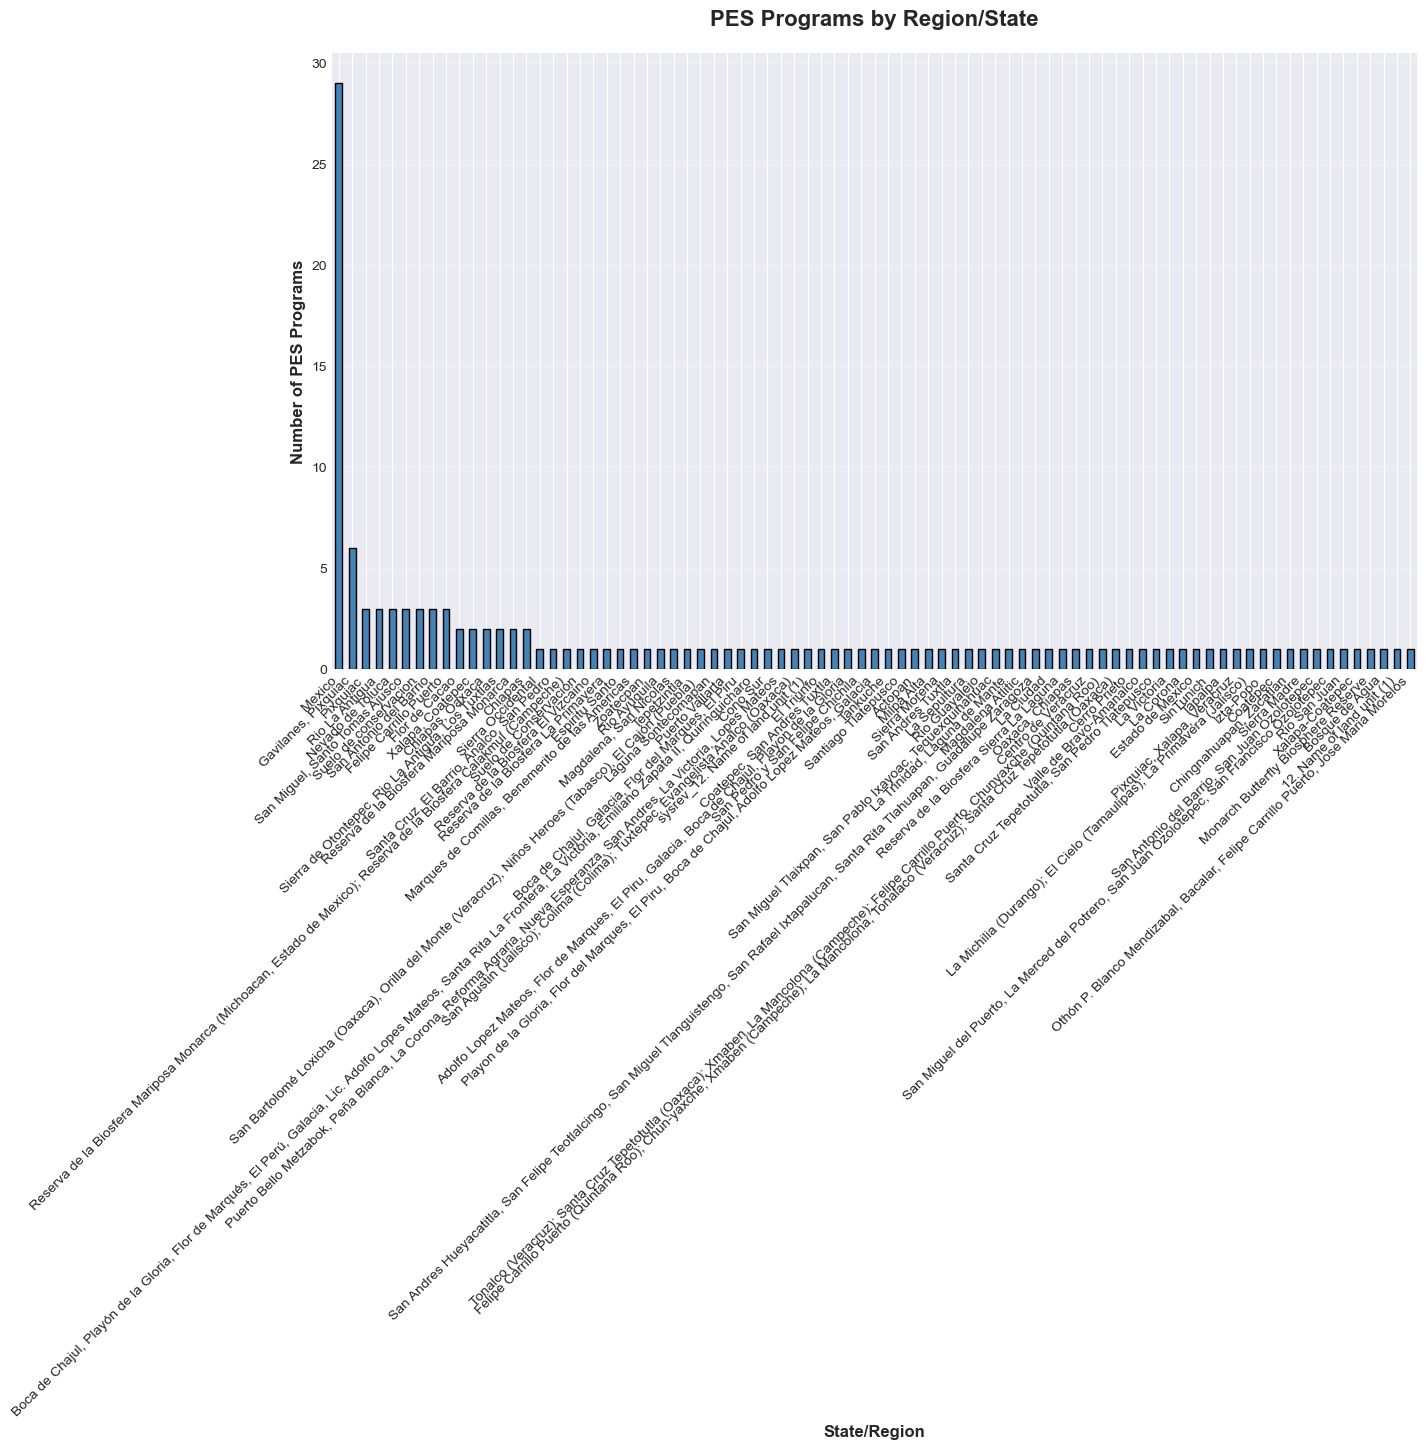


Programs by State/Region:
sysrev.15
Mexico                                                                                                                                                                       29
Gavilanes, Pixquiac                                                                                                                                                           6
Pixquiac                                                                                                                                                                      3
Rio La Antigua                                                                                                                                                                3
Nevado de Toluca                                                                                                                                                              3
San Miguel, Santo Tomas Ajusco                                                     

In [5]:
# Use "Name of land unit (1)" - meta.12 for states/regions
state_col = COLUMNS['name_of_land_unit']

if state_col in df.columns:
    print(f"Using column: {state_col} (Name of Land Unit)")
    
    # Count programs by state/region
    programs_by_state = df[state_col].value_counts().sort_values(ascending=False)
    
    # Create bar chart
    plt.figure(figsize=(14, 8))
    programs_by_state.plot(kind='bar', color='steelblue', edgecolor='black')
    plt.title('PES Programs by Region/State', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('State/Region', fontsize=12, fontweight='bold')
    plt.ylabel('Number of PES Programs', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nPrograms by State/Region:")
    print(programs_by_state)
    print(f"\nTotal programs: {len(df)}")
else:
    print(f"Column '{state_col}' not found in dataset.")

## 2. Programs by Type of Land Unit (Bar Chart)

Using column: sysrev.11 (Type of Land Unit)


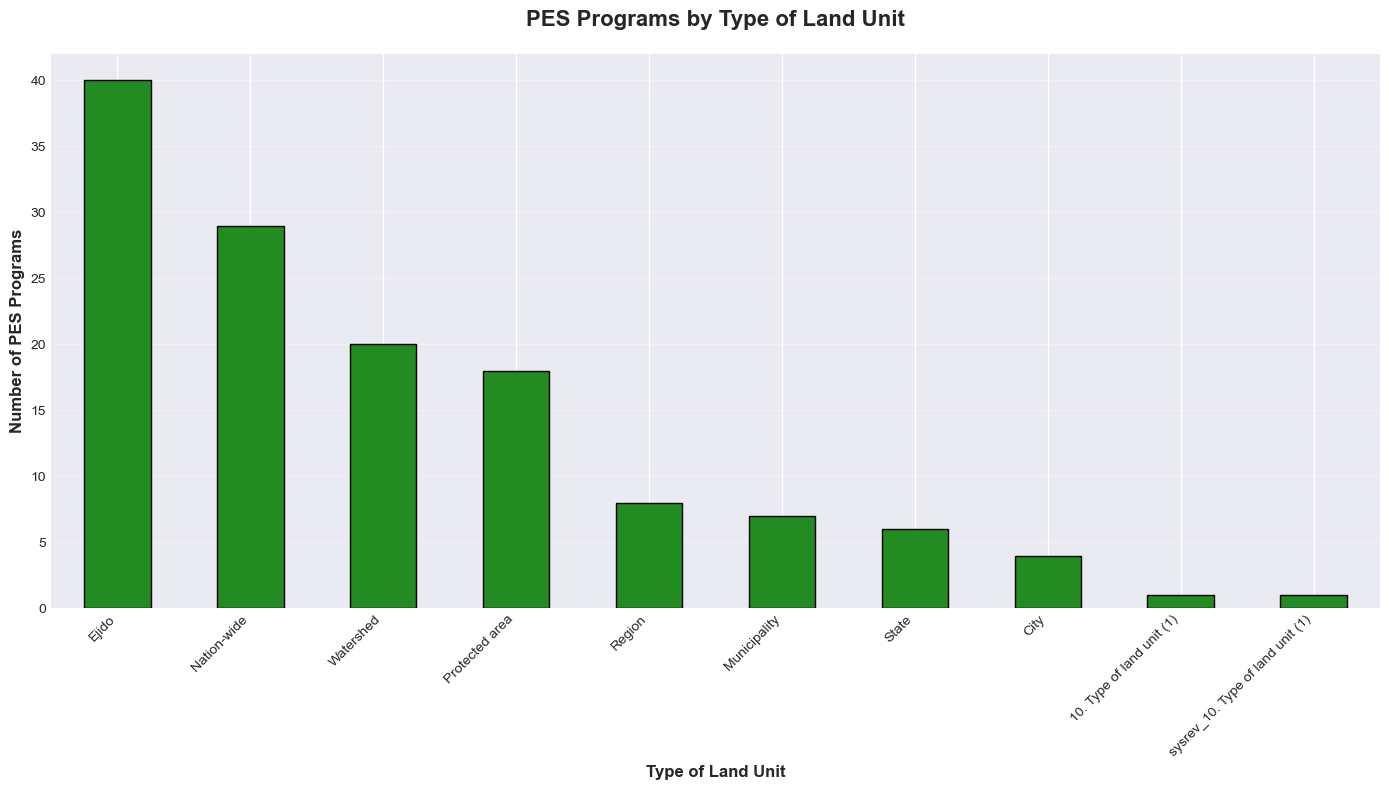


Programs by Type of Land Unit:
sysrev.11
Ejido                               40
Nation-wide                         29
Watershed                           20
Protected area                      18
Region                               8
Municipality                         7
State                                6
City                                 4
10. Type of land unit (1)            1
sysrev_10. Type of land unit (1)     1
Name: count, dtype: int64

Total programs: 142


In [6]:
# Use "Type of land unit (1)" - meta.10 for land unit types
land_type_col = COLUMNS['type_of_land_unit']

if land_type_col in df.columns:
    print(f"Using column: {land_type_col} (Type of Land Unit)")
    
    # Count programs by land unit type
    programs_by_land_type = df[land_type_col].value_counts().sort_values(ascending=False)
    
    # Create bar chart
    plt.figure(figsize=(14, 8))
    programs_by_land_type.plot(kind='bar', color='forestgreen', edgecolor='black')
    plt.title('PES Programs by Type of Land Unit', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Type of Land Unit', fontsize=12, fontweight='bold')
    plt.ylabel('Number of PES Programs', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nPrograms by Type of Land Unit:")
    print(programs_by_land_type)
    print(f"\nTotal programs: {len(df)}")
else:
    print(f"Column '{land_type_col}' not found in dataset.")

## 3. Programs by Themes Analyzed (Bar Chart)

Using column: sysrev.22 (Themes Analyzed)

Sample values:
0             16. Themes analysed (1)
1      sysrev_16. Themes analysed (1)
2        Design process and evolution
3        Design process and evolution
4              Policy recommendations
5    Ecological effectiveness-drivers
6         Social effectiveness-impact
7              Policy recommendations
8              Policy recommendations
9     Ecological effectiveness-impact
Name: sysrev.22, dtype: object


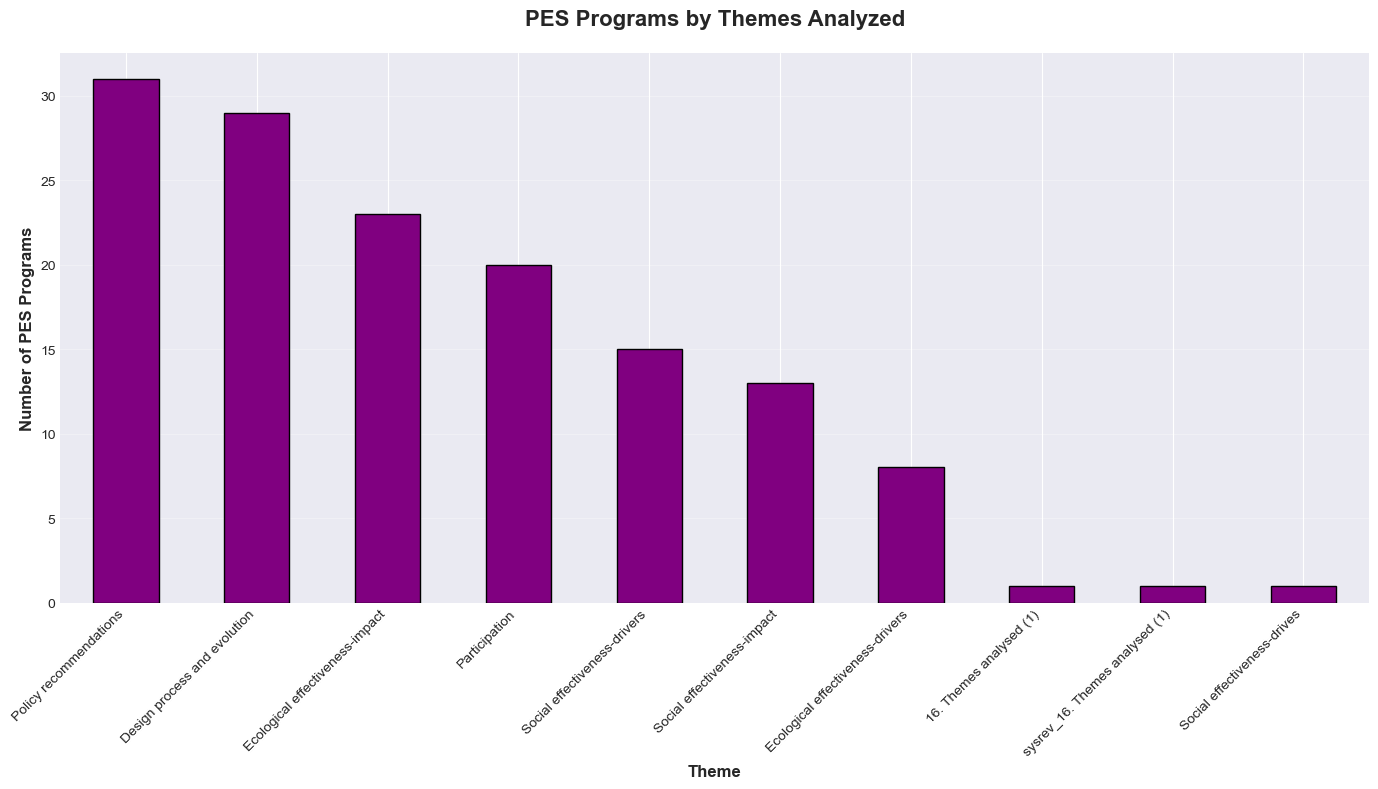


Programs by Theme:
sysrev.22
Policy recommendations              31
Design process and evolution        29
Ecological effectiveness-impact     23
Participation                       20
Social effectiveness-drivers        15
Social effectiveness-impact         13
Ecological effectiveness-drivers     8
16. Themes analysed (1)              1
sysrev_16. Themes analysed (1)       1
Social effectiveness-drives          1
Name: count, dtype: int64

Total theme occurrences: 142


In [7]:
# Use "Themes Analyzed (1)" - meta.16 for themes
themes_col = COLUMNS['themes_analyzed']

if themes_col in df.columns:
    print(f"Using column: {themes_col} (Themes Analyzed)")
    
    # Count programs by theme
    # Note: Themes might be comma-separated or in a list format
    # First, let's see the data structure
    print(f"\nSample values:")
    print(df[themes_col].head(10))
    
    # If themes are comma-separated, we need to split them
    # Check if values contain commas or are lists
    sample_val = str(df[themes_col].dropna().iloc[0]) if len(df[themes_col].dropna()) > 0 else ""
    
    if ',' in sample_val or ';' in sample_val:
        # Split by comma or semicolon
        separator = ',' if ',' in sample_val else ';'
        all_themes = df[themes_col].dropna().astype(str).str.split(separator).explode()
        all_themes = all_themes.str.strip()
        programs_by_theme = all_themes.value_counts().sort_values(ascending=False)
    else:
        # Single value per row
        programs_by_theme = df[themes_col].value_counts().sort_values(ascending=False)
    
    # Create bar chart
    plt.figure(figsize=(14, 8))
    programs_by_theme.plot(kind='bar', color='purple', edgecolor='black')
    plt.title('PES Programs by Themes Analyzed', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Theme', fontsize=12, fontweight='bold')
    plt.ylabel('Number of PES Programs', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nPrograms by Theme:")
    print(programs_by_theme)
    print(f"\nTotal theme occurrences: {programs_by_theme.sum()}")
else:
    print(f"Column '{themes_col}' not found in dataset.")

## 4. Programs Over Time (Line Chart)

Using column: webser.5 (Year)


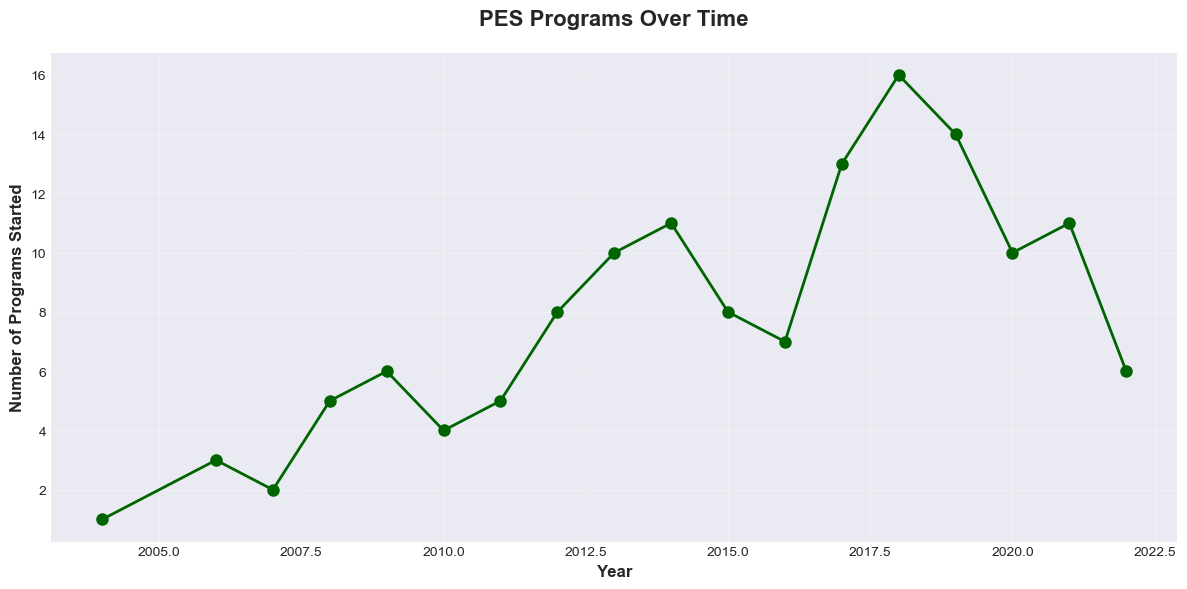


Programs by Year:
Year
2004.0     1
2006.0     3
2007.0     2
2008.0     5
2009.0     6
2010.0     4
2011.0     5
2012.0     8
2013.0    10
2014.0    11
2015.0     8
2016.0     7
2017.0    13
2018.0    16
2019.0    14
2020.0    10
2021.0    11
2022.0     6
Name: count, dtype: int64

Year range: 2004.0 - 2022.0


In [9]:
# Use "Year" column - webser.5
year_col = COLUMNS['year']

if year_col in df.columns:
    print(f"Using column: {year_col} (Year)")
    # Extract year if it's a date column
    if df[year_col].dtype == 'datetime64[ns]':
        df['Year'] = df[year_col].dt.year
    else:
        # Try to convert to numeric year
        df['Year'] = pd.to_numeric(df[year_col], errors='coerce')
    
    # Remove NaN years
    df_year_clean = df[df['Year'].notna()]
    
    # Count programs by year
    programs_by_year = df_year_clean['Year'].value_counts().sort_index()
    
    # Create line chart
    plt.figure(figsize=(12, 6))
    plt.plot(programs_by_year.index, programs_by_year.values, marker='o', linewidth=2, markersize=8, color='darkgreen')
    plt.title('PES Programs Over Time', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Year', fontsize=12, fontweight='bold')
    plt.ylabel('Number of Programs Started', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nPrograms by Year:")
    print(programs_by_year)
    print(f"\nYear range: {programs_by_year.index.min()} - {programs_by_year.index.max()}")
else:
    print(f"Column '{year_col}' not found in dataset.")

## 5. Ecological Effectiveness Assessment

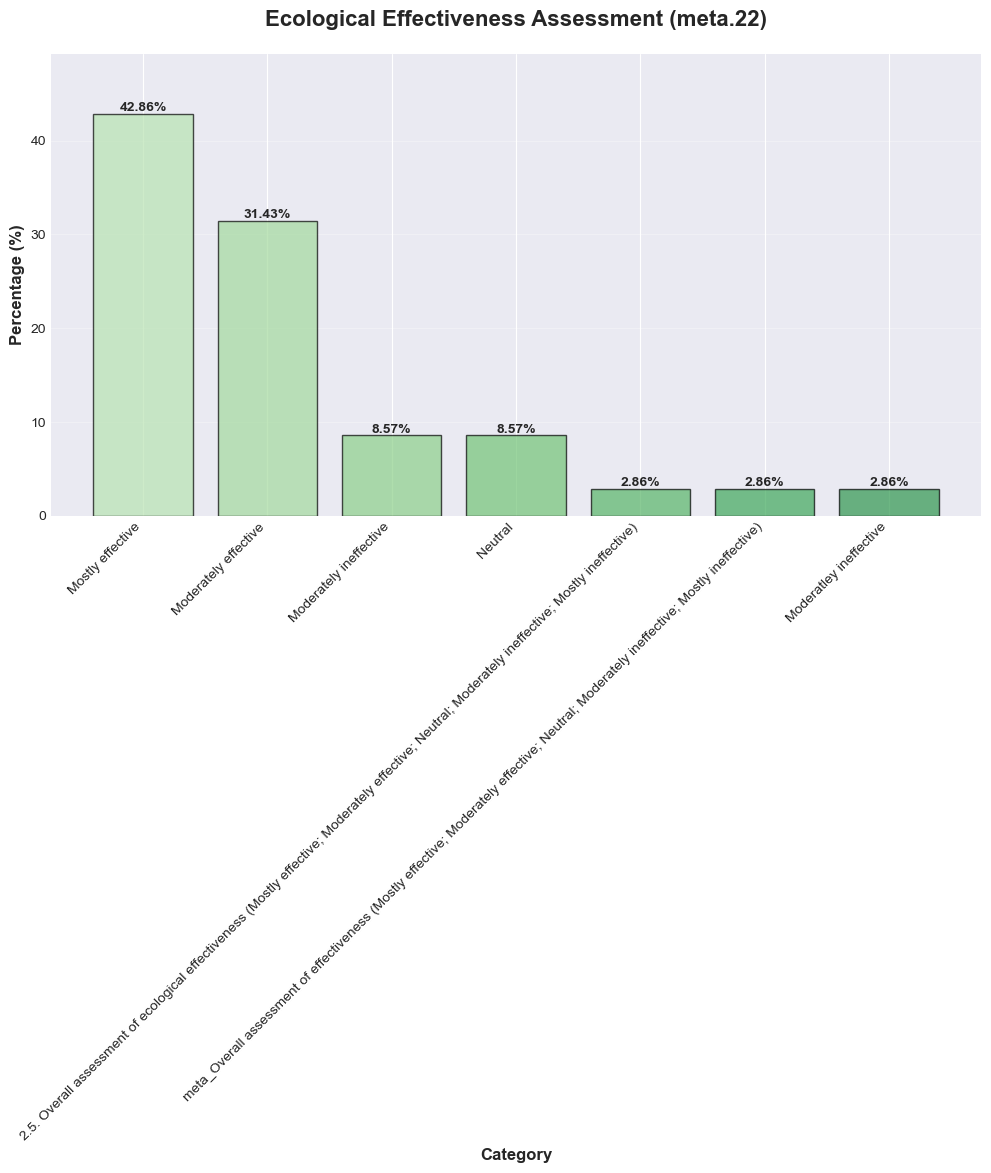


Ecological Effectiveness Assessment (meta.22):
meta.22
Mostly effective                                                                                                                                     15
Moderately effective                                                                                                                                 11
Moderately ineffective                                                                                                                                3
Neutral                                                                                                                                               3
2.5. Overall assessment of ecological effectiveness (Mostly effective; Moderately effective; Neutral; Moderately ineffective; Mostly ineffective)     1
meta_Overall assessment of effectiveness (Mostly effective; Moderately effective; Neutral; Moderately ineffective; Mostly ineffective)                1
Moderatley ineffective          

In [ ]:
# Helper function to create impact distribution chart
def create_impact_chart(col_name, col_key, title, color_scheme='default'):
    """Create a bar chart showing distribution of impact categories"""
    if col_name not in df.columns:
        print(f"Column '{col_name}' not found in dataset.")
        return
    
    # Get data
    impact_data = df[col_name].dropna()
    if len(impact_data) == 0:
        print(f"No data available for {col_name}")
        return
    
    # Use raw values (don't categorize, show actual values)
    impact_counts = impact_data.value_counts().sort_values(ascending=False)
    impact_percentages = (impact_counts / len(impact_data) * 100).round(2)
    
    # Create bar chart with PERCENTAGE on Y-axis
    plt.figure(figsize=(12, 6))
    
    # Use default color scheme or custom - check if it's a string first
    if isinstance(color_scheme, str) and color_scheme == 'default':
        colors_map = plt.cm.Set3(np.linspace(0, 1, len(impact_counts)))
    else:
        # Use the provided color scheme array, but ensure it has enough colors
        if len(color_scheme) < len(impact_counts):
            colors_map = plt.cm.Set3(np.linspace(0, 1, len(impact_counts)))
        else:
            colors_map = color_scheme[:len(impact_counts)]
    
    bars = plt.bar(range(len(impact_counts)), impact_percentages.values, 
                   color=colors_map, edgecolor='black', alpha=0.7)
    plt.title(title, fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Category', fontsize=12, fontweight='bold')
    plt.ylabel('Percentage (%)', fontsize=12, fontweight='bold')
    plt.xticks(range(len(impact_counts)), impact_counts.index, rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.ylim(0, max(impact_percentages.values) * 1.15)
    
    # Add percentage labels on bars (without count)
    for i, (bar, pct) in enumerate(zip(bars, impact_percentages.values)):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{pct}%',
                ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n{title}:")
    print(impact_counts)
    print("\nPercentages:")
    print(impact_percentages)
    print(f"\nTotal programs analyzed: {len(impact_data)}")

# Create chart for meta.22 - Ecological Effectiveness Assessment
create_impact_chart(
    COLUMNS['ecological_effectiveness'], 
    'ecological_effectiveness',
    'Ecological Effectiveness Assessment',
    plt.cm.Greens(np.linspace(0.3, 0.9, 10))
)

## 6. Ecological Effect Direction

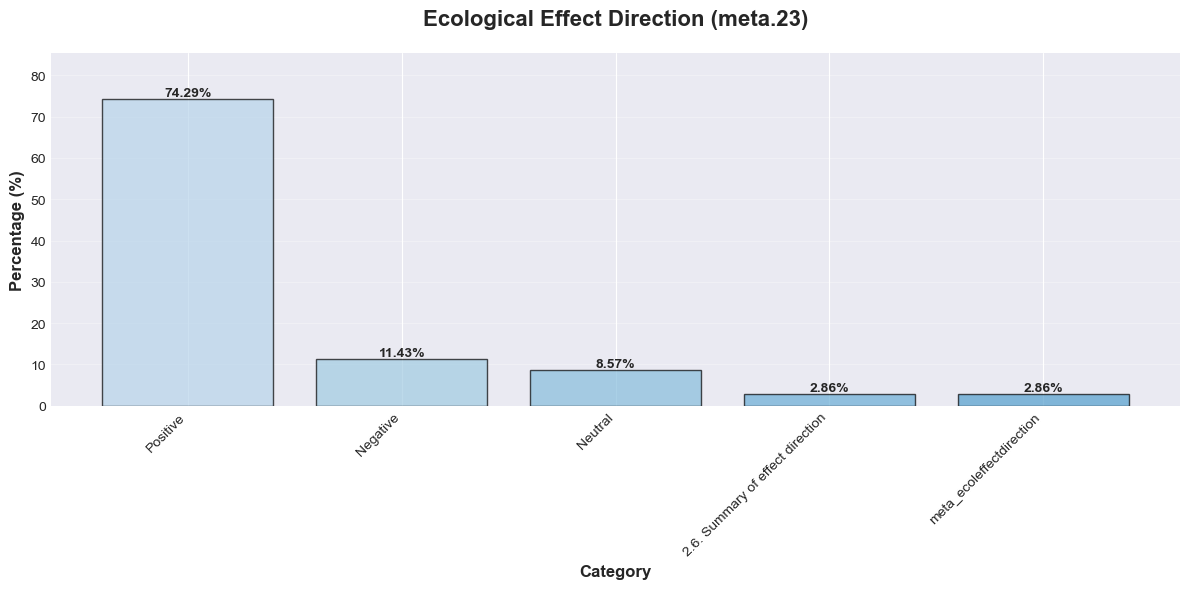


Ecological Effect Direction (meta.23):
meta.23
Positive                            26
Negative                             4
Neutral                              3
2.6. Summary of effect direction     1
meta_ecoleffectdirection             1
Name: count, dtype: int64

Percentages:
meta.23
Positive                            74.29
Negative                            11.43
Neutral                              8.57
2.6. Summary of effect direction     2.86
meta_ecoleffectdirection             2.86
Name: count, dtype: float64

Total programs analyzed: 35


In [ ]:
# Create chart for meta.23 - Ecological Effect Direction
create_impact_chart(
    COLUMNS['ecological_effect_direction'], 
    'ecological_effect_direction',
    'Ecological Effect Direction',
    plt.cm.Blues(np.linspace(0.3, 0.9, 10))
)

## 7. Social Effectiveness Assessment

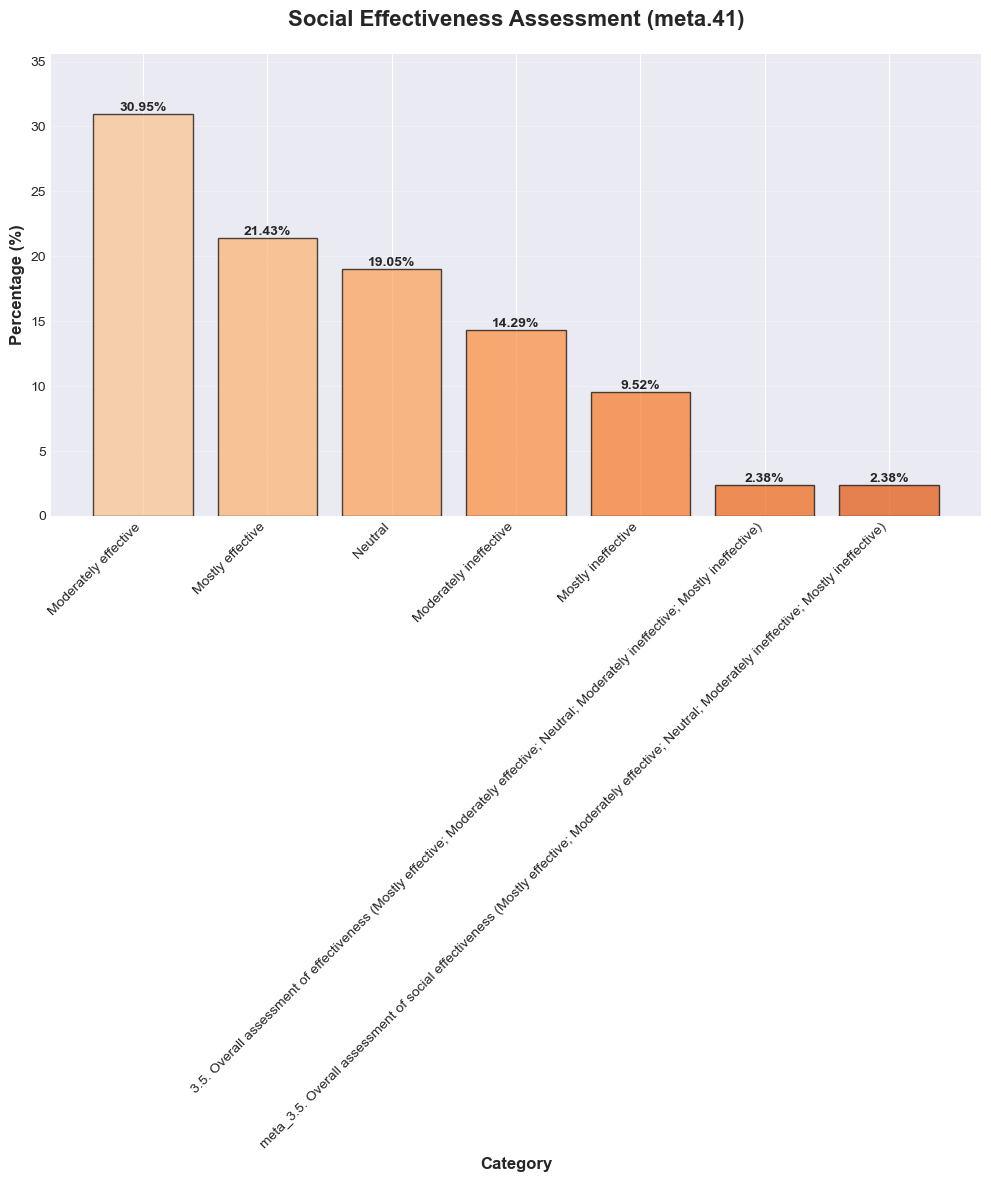


Social Effectiveness Assessment (meta.41):
meta.41
Moderately effective                                                                                                                                  13
Mostly effective                                                                                                                                       9
Neutral                                                                                                                                                8
Moderately ineffective                                                                                                                                 6
Mostly ineffective                                                                                                                                     4
3.5. Overall assessment of effectiveness (Mostly effective; Moderately effective; Neutral; Moderately ineffective; Mostly ineffective)                 1
meta_3.5. Overall assessment o

In [ ]:
# Create chart for meta.41 - Social Effectiveness Assessment
create_impact_chart(
    COLUMNS['social_effectiveness'], 
    'social_effectiveness',
    'Social Effectiveness Assessment',
    plt.cm.Oranges(np.linspace(0.3, 0.9, 10))
)

## 8. Social Effect Direction

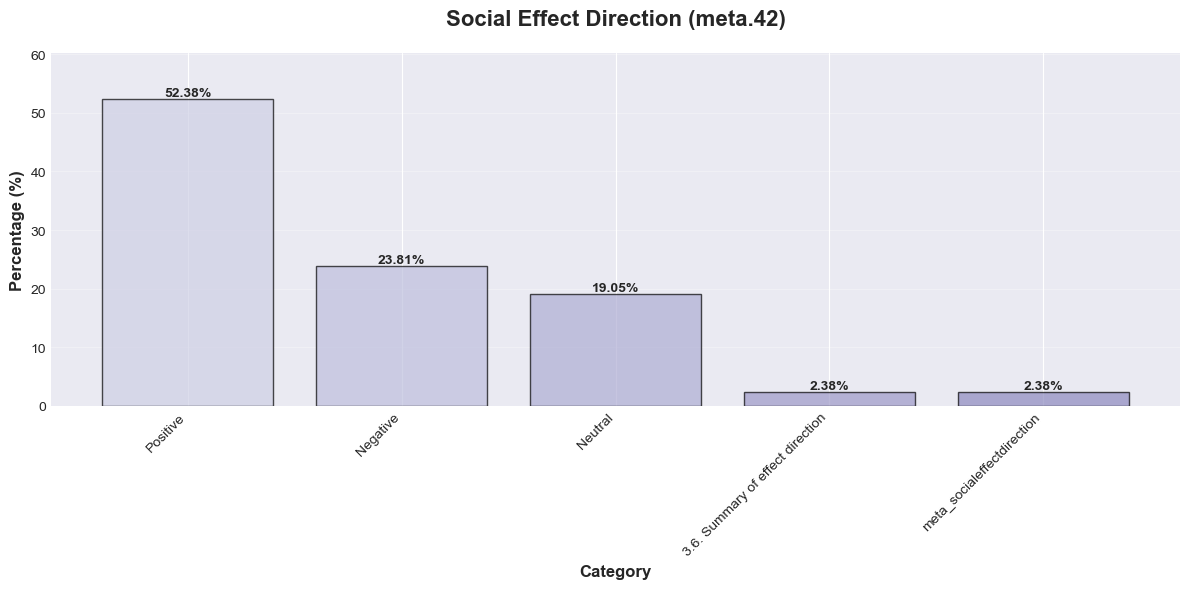


Social Effect Direction (meta.42):
meta.42
Positive                            22
Negative                            10
Neutral                              8
3.6. Summary of effect direction     1
meta_socialeffectdirection           1
Name: count, dtype: int64

Percentages:
meta.42
Positive                            52.38
Negative                            23.81
Neutral                             19.05
3.6. Summary of effect direction     2.38
meta_socialeffectdirection           2.38
Name: count, dtype: float64

Total programs analyzed: 42


In [ ]:
# Create chart for meta.42 - Social Effect Direction
create_impact_chart(
    COLUMNS['social_effect_direction'], 
    'social_effect_direction',
    'Social Effect Direction',
    plt.cm.Purples(np.linspace(0.3, 0.9, 10))
)

## Data Reference

In [ ]:
# Display all column names for reference
print("All available columns in the dataset:")
print("\n".join([f"{i+1}. {col}" for i, col in enumerate(df.columns)]))

# Summary of columns being used
print("\n" + "="*60)
print("COLUMNS USED IN ANALYSIS:")
print("="*60)
print("1. Type of Land Unit (1): sysrev.11")
print("2. Name of Land Unit (1): sysrev.15 (for state/region)")
print("3. Themes Analyzed (1): sysrev.22")
print("4. Year: webser.5")
print("5. Ecological outcome magnitude: meta.21")
print("6. 2.5 Overall assessment of ecological effectiveness: meta.22")
print("7. 2.6 Summary of effect direction (ecological): meta.23")
print("8. 3.4 Social outcome magnitude: meta.40")
print("9. 3.5 Overall assessment of effectiveness (social): meta.41")
print("10. 3.6 Summary of effect direction (social): meta.42")
print("="*60)